In [35]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.metrics import accuracy_score,classification_report

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# getting mnist dataset from keras
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [3]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape
# here 28,28 is image size and 60000 images in training and in test data 10000 images
# all image size should be same, if not need to resize image using cv2.resize(image,(28,28))

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train[0]
print(X_train[0].shape)

(28, 28)


5


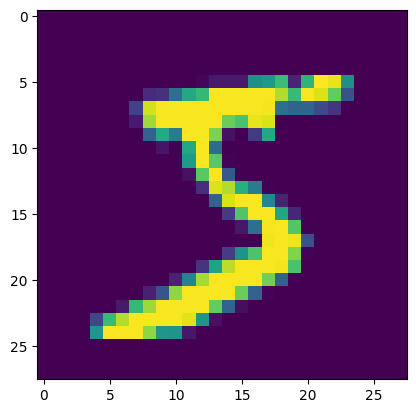

In [5]:
# lets check some of datapoints
plt.imshow(X_train[0])
print(Y_train[0])

In [6]:
## unique numbers present in dataset
print("unique in training",np.unique(Y_train))
print("unique in testing",np.unique(Y_test))

unique in training [0 1 2 3 4 5 6 7 8 9]
unique in testing [0 1 2 3 4 5 6 7 8 9]


In [7]:
print(X_train[0])
print(type(X_train[0]))
# data is in the form of numy array. elements of the array ranging from 0 to 255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
# we can scale this array by dividing it to 255 as pixel values ranging from 0 to 255
X_train = X_train/255
X_test = X_test/255

In [9]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# Y_train = Y_train.reshape((1,-1))

In [11]:
## Building Neural Network

# model = Sequential()
# model.add(Dense(units=32,activation='relu',input_shape=(28,28)))
# model.add(Dropout(0.4))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(10,activation='softmax'))


model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(50,activation='relu'),
    Dense(10,activation='sigmoid')
])

In [12]:
model.compile(optimizer=Adam(0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2531 - accuracy: 0.9259
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1714 - accuracy: 0.9503
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1504 - accuracy: 0.9570
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1377 - accuracy: 0.9615
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1273 - accuracy: 0.9635
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1223 - accuracy: 0.9660
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1168 - accuracy: 0.9671
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1120 - accuracy: 0.9688
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1063 - accuracy: 0.9703
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.108

In [16]:
X_train[0].shape

(28, 28)

In [17]:
### prediction on test data

In [24]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 800us/step


In [25]:
y_pred

array([[1.0868415e-28, 7.9278582e-19, 8.7256637e-09, ..., 1.0000000e+00,
        3.2775505e-10, 1.9920250e-15],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        8.3166815e-06, 0.0000000e+00],
       [3.6981263e-24, 1.0000000e+00, 4.9244188e-18, ..., 8.2441041e-09,
        3.7830506e-04, 3.8064360e-14],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.1607126e-14,
        6.0005845e-26, 9.9999607e-01],
       [5.1086512e-23, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.1199360e-17, 0.0000000e+00],
       [9.9994105e-01, 0.0000000e+00, 7.9619523e-12, ..., 0.0000000e+00,
        7.3814003e-06, 0.0000000e+00]], dtype=float32)

In [26]:
## It gives probabilities, need to convert in to classes by taking argmax
y_pred = [np.argmax(i) for i in y_pred] 

In [27]:
y_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 4,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 4,
 5,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 1,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 1,
 4,
 4,
 5,
 1,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 0,
 7,
 8,
 9,
 3,
 3,
 4,
 4,
 4,
 1,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 1,
 9,
 7,
 7,
 5,
 1,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 5,
 4,
 3,
 1,
 4,
 1,
 7,
 5,
 9,
 4,
 0,
 5,
 4,
 5,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 5,
 4,
 4,
 0,
 5,
 8,
 5,
 5,
 5,
 5,
 3,
 8,
 1,
 0,
 1,
 6,
 4,
 5,
 7,
 3,
 1,
 3,
 1,
 8,
 2,
 0,
 7,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 5,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 1,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 3,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 5,
 4,
 1,
 2,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 1,
 9,
 4,
 5,
 3,
 3,
 9,
 0,
 3,
 5,
 5,
 3,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 5,
 8,
 7,
 9,
 2,
 1,
 4,
 1,
 3,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 1,


In [31]:
# lets check accuracy of model on test data
accuracy_score(Y_test,y_pred)

0.7878

(<matplotlib.image.AxesImage at 0x14e899090>, 7)

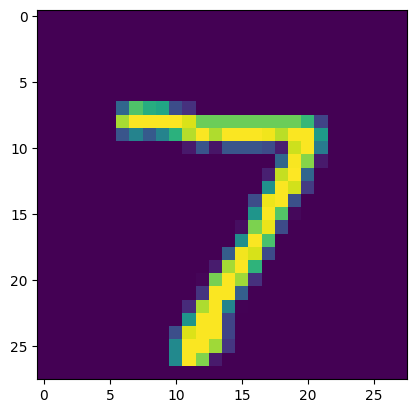

In [34]:
plt.imshow(X_test[0]),Y_test[0]

In [37]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       980
           1       0.62      0.99      0.76      1135
           2       0.91      0.51      0.65      1032
           3       0.80      0.81      0.80      1010
           4       0.75      0.96      0.84       982
           5       0.53      0.82      0.64       892
           6       0.95      0.26      0.41       958
           7       0.97      0.91      0.94      1028
           8       0.95      0.91      0.93       974
           9       0.96      0.69      0.80      1009

    accuracy                           0.79     10000
   macro avg       0.83      0.78      0.77     10000
weighted avg       0.83      0.79      0.78     10000



In [39]:
## testing on unseen data
img = cv2.imread('images.png')

In [41]:
img.shape

(130, 129, 3)

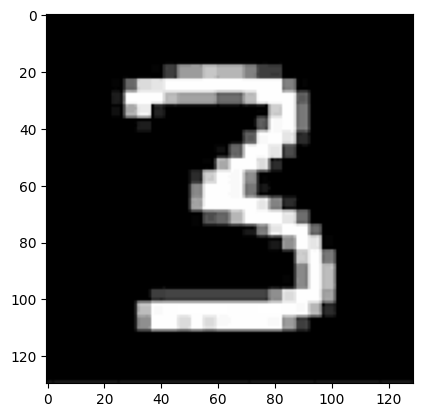

In [42]:
plt.imshow(img)

In [43]:
## we need to convert it to 28,28 as our model is trained on 28,28 shape images, also need to make it grayscale
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

(<matplotlib.image.AxesImage at 0x14f253150>, (130, 129))

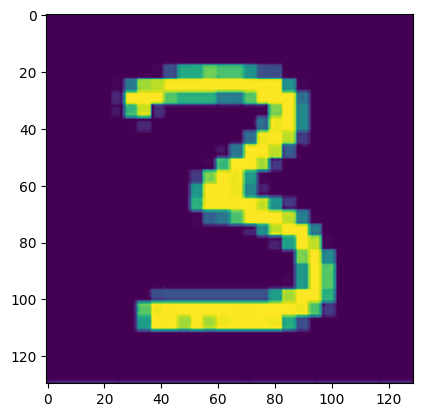

In [45]:
plt.imshow(gray_img),gray_img.shape

In [54]:
# now shape is 130,129 -> need to convert it to 28,28
reshaped_img = cv2.resize(gray_img,(28,28))

(<matplotlib.image.AxesImage at 0x151130d50>, (28, 28))

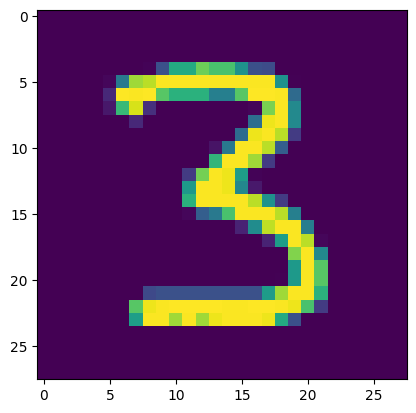

In [55]:
plt.imshow(reshaped_img),reshaped_img.shape

In [56]:
# we need to scale this image and rehsape in to (1,28,28) -> as it is one image woth 28,28 dimension
# in case of RGB image -> (1,28,28,3)

reshape_img_scaled = reshaped_img/255
reshaped_img = np.reshape(reshape_img_scaled,(1,28,28))

In [57]:
# Now we can predict on image.
unseen_img_pred = model.predict(reshaped_img)

1/1 [==============================] - 0s 15ms/step


In [60]:
np.argmax(unseen_img_pred)

3